-0.009574985872910023
-0.001823378187249482
0.014991734695124305
0.03180684757749809
places
0.03516987015397285
-0.006867912051961617
-0.028524502619548864
[0.01173885504722837, 0.010707313749387756, 0.009545138861219934, 0.010230436951987833, 0.010402502038624264, 0.010131933500792462, 0.010207608170033373, 0.010294697230251513]
<class 'pandas.core.series.Series'>
count    8.000000
mean     0.010407
std      0.000629
min      0.009545
25%      0.010189
50%      0.010263
75%      0.010479
max      0.011739
dtype: float64


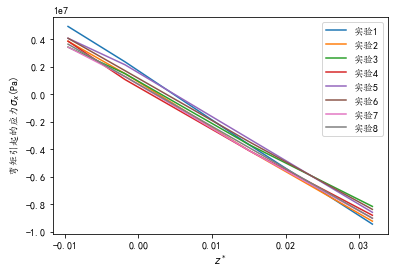

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import linear_model 

# 由实验一得到的已知数据
E = 214.6e9
I_y = 29.9e-6 * 9e-4
# import data
df = pd.read_csv('input/data123.csv')
experiments = np.arange(1, 7)
df_exprmnts = [0] * 7
for i in experiments:
    df_exprmnts[i] = df[df['experiment'] == i]

# sgs = [2, 5, 3, 7, 8,  11, 9]
# sg_places = 1e-2 * np.array([[2, 0], [1.79, 0], [0.5, 0], [0,0.6],[0,2.6],  [0, 2.78], [0, 4.6]])
sgs = [3, 7, 8, 9]
sg_places = 1e-2 * np.array([[0.5, 0], [0,0.6],[0,2.6], [0, 4.6]])
# sgs = [2, 3, 7, 8, 9]
# sg_places = 1e-2 * np.array([[2, -0.05], [0.5, -0.05], [-0.05,0.6],[-0.05,2.6], [-0.05, 4.6]])
# print(sg_places)
hat_z_dir = np.array([np.cos(122.78 * np.pi / 180), np.sin(122.78 * np.pi / 180)])
hat_y_dir = np.array([np.cos(32.78 * np.pi / 180), np.sin(32.78 * np.pi / 180)])

centroid = 1e-2 * np.array([0.89, 1.39])
# print(centroid)
hat_zs = [0] * len(sgs)
for i in range(len(sgs)):
    hat_zs[i] = np.dot(hat_z_dir, sg_places[i] - centroid)
    print(hat_zs[i])

print('places')
print(np.dot(hat_z_dir, [0, 0.05] - centroid))
# print(np.dot(hat_y_dir, [0, 0.050] - centroid))
print(np.dot(hat_z_dir, [0, 0] - centroid))
# print(np.dot(hat_y_dir, [0, 0] - centroid))
print(np.dot(hat_z_dir, [0.040, 0] - centroid))
# print(np.dot(hat_y_dir, [0.040, 0] - centroid))

BC = []
# for expr in [1, 2]:
#解决中文显示问题
plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

for expr in [1, 2]:
    nd_dif = np.array(df_exprmnts[expr][['sg' + str(i) for i in sgs]])
    # print(nd_dif)
    for i in range(4):
        nd_dif[i, :] = nd_dif[i + 1, :] - nd_dif[i, :]
    nd_dif = np.delete(nd_dif, -1, axis = 0)
    # print(nd_dif)
    for i in range(4):
        plt.plot(hat_zs, [j * 1e-6 * E - 800. / 81e-6 for j in nd_dif[i, :]])
        # print([j * 1e-6 * E - 800. / 81e-6 for j in nd_dif[i, :]])
        clf = linear_model.LinearRegression()
        clf.fit([[i] for i in hat_zs], [j * 1e-6 * E - 800. / 81e-6 for j in nd_dif[i, :]])
        M_I_y = clf.coef_ 
        # print(type(M_I_y))
        BC += [np.abs(M_I_y[0] * I_y / 800.)]
        # print(BC)


print(BC)
print(type(pd.Series(BC)))
print(pd.Series(BC).describe())
plt.legend(['实验' + str(i + 1) for i in range (8)])
plt.xlabel(r'$z^*$')
plt.ylabel(r'弯矩引起的应力$\sigma_x$(Pa)')
plt.show()
